# Sentiment Analysis of Twitter Feedback Data on Apple and Google Products

### INTRODUCTION

According to a [Marquees Brownlee](https://www.youtube.com/watch?v=OFvXuyITwBI&ab_channel=MarquesBrownlee), apple have the best smartphones and products in the world. Is he right? Let's look at the stats. More than 100 million people use Macs globally. Apple had the best-selling smartphones worldwide in 2021. In 2022, iPhone sales were $42.626 billion, versus $38.868 billion the previous year. Revenue for the second quarter of 2023 came in at $94.8B versus the consensus estimate of $92.9B and according to [investing.com](https://www.investing.com/academy/statistics/apple-facts/#:~:text=Apple%20had%20the%20best%2Dselling,million%20people%20use%20Macs%20globally.) as of July this year, apple leads the pack with smartphone market share of 28.39%. Okay so maybe Marquees Brownlee has a point. As the best technology reviewer,Marquees, has over 17 million youtube subscribers with great viewership. Youtubers like him and others influence the 2.1 billion plus active youtube users to take interest or even buy apple products which in part demonstrates the linkage between apple and google product users.

Handling over 90% of all search queries worldwide, Google is undoubtedly dominating the global search engine market share. As of August 2023, a whopping 91.85% of all search queries conducted across all search engine providers are done through the internet giant. Some google products and the number of users are indicated below:
* Google Search - 3.6 billion+
* Android - 3 billion+
* Chrome - 2.65 billion+
* Gmail - 1.8 billion+
* Google Drive - 1 billion+
* Google Maps - 1 billion+
* Google Play Store - 2.5 billion+
* YouTube - 2.1 billion+
* Google Photos - 1 billion+

With the number of apple and google users growing and the use of new slang and new urban abbreviated words rising for example omfgpm, it is increasingly difficult to keep up with the feedback on twitter. 

We can use machine learning to see whether the emotion of a tweet is positive, negative or neutral. Tweets are different that other text data because they are usually in informal conversational language and they they are short. It is important for apple and google to monitor their twitter feed meticulously so as to observe customer opinion and adjust their policies where necessary. If not, they should outsource analytics services from analytics companies.

### METHODOLOGY
The project will follow a structured methodology encompassing the following steps:
* Data Collection: The data was sourced from [here](https://data.world/crowdflower/brands-and-product-emotions). It contains tweet reviews of apple and google products.
* Data Preprocessing: Clean and preprocess the tweet data by removing URLS and hashtags, irrelevant information like special twitter wordsd e.g TR, and performing tasks such as tokenization, and removing stopwords. There was need for separation of the apple and google products to understand each company products' sentiments and make recommendations.
* List of libraries used and why:
    * import re #text data preprocessing
    * import string #collection of string functions
    * import nltk #for NLP tasks
    * import pandas as pd 
    * from textblob import TextBlob #NLP library
    * from collections import Counter #frequency analysis
    * import matplotlib.pyplot as plt #plotting visualization
    * from nltk.corpus import stopwords #list of common stop words in different languages
    * from textblob import TextBlob #NLP library
    * from collections import Counter #frequency analysis
    * from sklearn.feature_extraction.text #provides tools for text data preprocessing
    * import TfidfVectorizer #Converts text data into numerical 
* Model: This project involved training machine learning model (such as a LSTM, GRU and RNN for deep learning model) using the preprocessed dataset to classify tweets into positive, negative, or neutral sentiments. Evaluate the model's performance using appropriate evaluation metrics which has been done in this project.
* Evaluation: After classification report and deep learning were applied, it was easy to note that the best model to use is LSTM which can accurately classify sentiments as either positive, negative or neutral with an accuracy score of 96%.

* Insights and Recommendations: Analyze sentiment analysis results to generate actionable insights and recommendations for improving customer satisfaction, addressing pain points, and managing brand reputation effectively.
* Response and Engagement Strategy: Develop a strategy for airlines to respond to negative sentiment and engage with customers in a timely and personalized manner. Implement systems and processes to manage customer feedback, complaints, and turnaround negative experiences into positive ones.

### PROBLEM STATEMENT

The expanding market presence of Apple and Google products has resulted in a significant surge in their user base within the industry. This expansion has, in turn, generated a substantial volume of feedback from customers expressing both satisfaction and dissatisfaction, with a notable portion of this feedback originating from Twitter. Consequently, addressing these customer concerns and proactively improving the overall perception of their respective brands has become a paramount priority for both Apple Inc. and Google.

### MAIN OBJECTIVE
To create a sentiment analysis model capable of evaluating the sentiment expressed in a tweet's content, initially as a binary classifier for positive and negative tweets, with the potential for expansion to a multiclass classifier by incorporating neutral tweets.

####  SPECIFIC OBJECTIVES

1. To develop a real-time monitoring system capable of retrieving and classifying live tweets related to Apple and Google products using the sentiment analysis model, ensuring scalability to handle high volumes of incoming tweets.

2. To conduct an in-depth analysis of the sentiment classification model's performance and fine-tune it for optimal accuracy and efficiency.

3. Identify which company has more negative sentiments and form recommendations

4. To explore the feasibility of integrating additional sources of customer feedback, such as customer reviews on e-commerce platforms, into the sentiment analysis system to provide a comprehensive view of customer sentiment beyond Twitter data.

## Data Preparation

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install scikeras

In [5]:
# import necessary libraries
import re
import string
import nltk
import pandas as pd
import numpy as np
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, GRU
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier 

# downloads
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vanes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
main_df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="latin-1")
main_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion_described,original_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


## Data Exploration and Preprocessing

In [7]:
main_df.shape


(9093, 4)

Let's explore the dataset to understand its contents.

In [8]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(main_df.columns)

    # Print data types
    print("\nData Types:")
    print(main_df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(main_df.shape)

    # Print df information
    print("\nInfo:")
    print(main_df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(main_df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((main_df.isna().sum()/len(main_df)) * 100)

describe_columns(main_df)

Column Names:
Index(['tweet_text', 'emotion_in_tweet_is_directed_at', 'emotion_described',
       'original_tweet_text'],
      dtype='object')

Data Types:
tweet_text                         object
emotion_in_tweet_is_directed_at    object
emotion_described                  object
original_tweet_text                object
dtype: object

Shape:
(9093, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       9092 non-null   object
 1   emotion_in_tweet_is_directed_at  3291 non-null   object
 2   emotion_described                9093 non-null   object
 3   original_tweet_text              9092 non-null   object
dtypes: object(4)
memory usage: 284.3+ KB
None

Descriptive Statistics:
                                               tweet_text  \
count                          

Missing values in the "tweet_text" will be dropped to ensure model runs effectively

In [9]:
main_df.dropna(subset=['tweet_text'], inplace=True)

In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       9092 non-null   object
 1   emotion_in_tweet_is_directed_at  3291 non-null   object
 2   emotion_described                9092 non-null   object
 3   original_tweet_text              9092 non-null   object
dtypes: object(4)
memory usage: 355.2+ KB


In [11]:
# Removing @ symbol on tweet_text but retain them in original_tweet_text column for contextual purposes
def remove_nametags(sentence):
    """A simple function to remove name tags"""
    if isinstance(sentence, str):
        clean_words = []
        for word in sentence.split():
            if "@" not in word:
                clean_words.append(word)
        return " ".join(clean_words)
    else:
        return sentence

main_df["tweet_text"] = main_df["tweet_text"].apply(remove_nametags)

In [12]:
main_df[:50]

,tweet_text,emotion_in_tweet_is_directed_at,emotion_described,original_tweet_text
0,I have a 3G iPhone. After 3 hrs tweeting at #R...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,Know about ? Awesome iPad/iPhone app that you'...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,Can not wait for #iPad 2 also. They should sal...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,I hope this year's festival isn't as crashy as...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,great stuff on Fri #SXSW: Marissa Mayer (Googl...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...
5,New iPad Apps For #SpeechTherapy And Communica...,NaN,No emotion toward brand or product,@teachntech00 New iPad Apps For #SpeechTherapy...
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,"#SXSW is just starting, #CTIA is around the co..."
8,Beautifully smart and simple idea RT wrote abo...,iPad or iPhone App,Positive emotion,Beautifully smart and simple idea RT @madebyma...
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Counting down the days to #sxsw plus strong Ca...
10,Excited to meet the at #sxsw so I can show the...,Android,Positive emotion,Excited to meet the @samsungmobileus at #sxsw ...


In [13]:
type(main_df["tweet_text"])

pandas.core.series.Series

In [14]:
main_df.isna().sum()

tweet_text                            0
emotion_in_tweet_is_directed_at    5801
emotion_described                     0
original_tweet_text                   0
dtype: int64

In [15]:
main_df.dropna(inplace = True)

In [16]:
#pip install nltk (commented since requirement has already been satisfied)

In [17]:
# download stop words
# nltk.download('stopwords') (commented because it is already downloaded and up to date)

# clean the text data
def clean_text(text):
    # Remove URLs, hashtags, targets, and special Twitter words
    text = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+|RT", "", text)
    
    # Convert text to lowercase
    text = text.lower()
        
    # Replace emoticons with sentiment polarity (not implemented here, requires mapping)
    
    # Remove punctuation and special characters
    text = "".join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text which splits text into words
    tokens = text.split()

    # Remove stopwords 
    stopwords_list = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Join tokens back into text
    text = ' '.join(tokens)
    
    return text

main_df['clean_text'] = main_df['tweet_text'].apply(clean_text)
main_df["clean_text"]  

0       3g iphone 3 hrs tweeting dead need upgrade plu...
1       know awesome ipadiphone app youll likely appre...
2                                        wait 2 also sale
3        hope years festival isnt crashy years iphone app
4       great stuff fri marissa mayer google tim oreil...
                              ...                        
9077    pr guy convinced switch back iphone great cove...
9079       quotpapyrussort like ipadquot nice lol lavelle
9080    diller says google tv quotmight run playstatio...
9085    ive always used camera iphone bc image stabili...
9088                                 ipad everywhere link
Name: clean_text, Length: 3291, dtype: object

I would like to check most common negative and positive words in the dataset

In [18]:
#pip install textblob


### Sentimental Analysis

In [19]:
# sentiment analysis

# Function to perform sentiment analysis and create a frequency table
def analyze_sentiments_and_plot_frequency(main_df, tweet_text):
    # Creating a TextBlob object for each tweet and calculate sentiment
    main_df['sentiment'] = main_df[tweet_text].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Define sentiment labels
    def get_sentiment_label(sentiment):
        if sentiment > 0:
            return 'Positive'
        elif sentiment < 0:
            return 'Negative'
        else:
            return 'Neutral'
    
    main_df['sentiment_label'] = main_df['sentiment'].apply(get_sentiment_label)
    
    # Create a frequency table for sentiment labels
    sentiment_counts = Counter(main_df['sentiment_label'])
    return sentiment_counts

sentiment_counts = analyze_sentiments_and_plot_frequency(main_df, 'tweet_text')
analyze_sentiments_and_plot_frequency(main_df, 'tweet_text')
print(sentiment_counts)

Counter({'Positive': 1932, 'Neutral': 909, 'Negative': 450})


The frequency table indicates Negative sentiments are the least present in the dataset. Lets investigate further to understand the negative sentiments and eventually make recommendations for them.

Let's plot a bar graph to represent this information

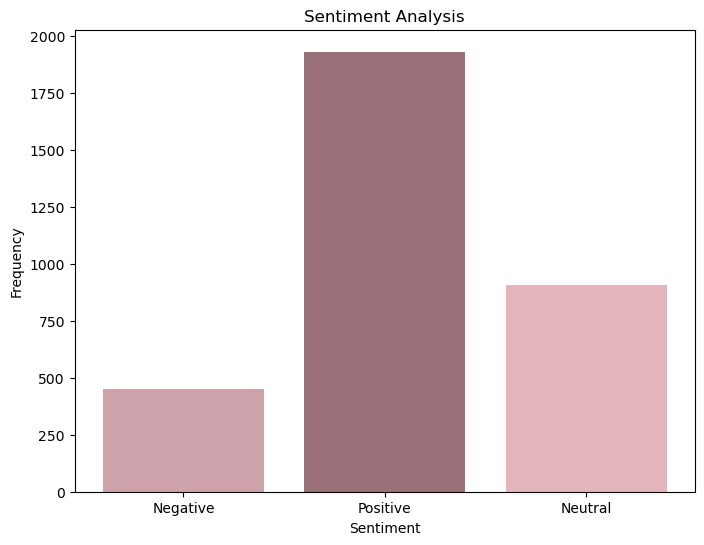

In [20]:
colors = {
    'Positive': '#9b7179',
    'Negative': '#cda2aa',
    'Neutral': '#e5b5be'
}

# Plot a bar graph for sentiment frequency
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=[colors[label] for label in sentiment_counts.keys()])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()

The bar chart above shows positive sentiments are the majority in the dataset for apple and google products, to understand the sentiments, I separated the companies and analysed customer opinions as shown in the next steps.

In [21]:
# pip install wordcloud (commented because requirement already satisfied)

## Sentiment Analysis for Apple and Google separately

In [22]:
unique_sentiments = main_df['emotion_described'].unique()
print(unique_sentiments)

['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product' "I can't tell"]


In [23]:
# Separate data for Apple and Google
apple_data = main_df[main_df['emotion_in_tweet_is_directed_at'] == 'Apple']
google_data = main_df[main_df['emotion_in_tweet_is_directed_at'] == 'Google']

C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\1666638919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data[tweet_text].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\1666638919.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_label'] = data['sentiment'].apply(get_sentiment_label)


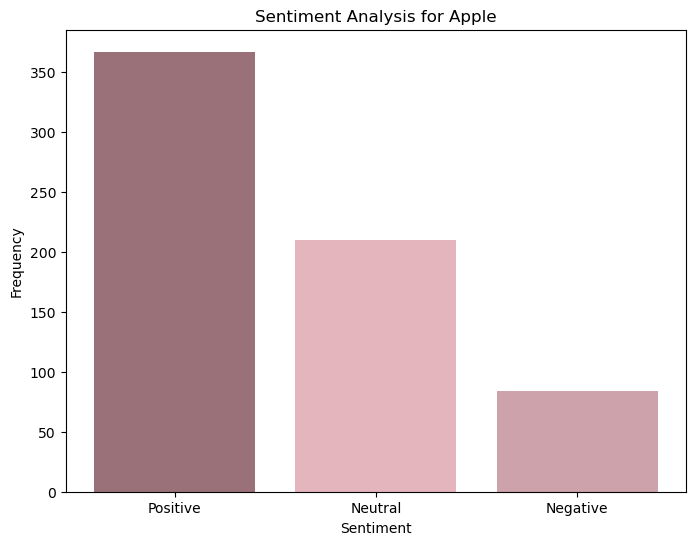

C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\1666638919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data[tweet_text].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\1666638919.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_label'] = data['sentiment'].apply(get_sentiment_label)


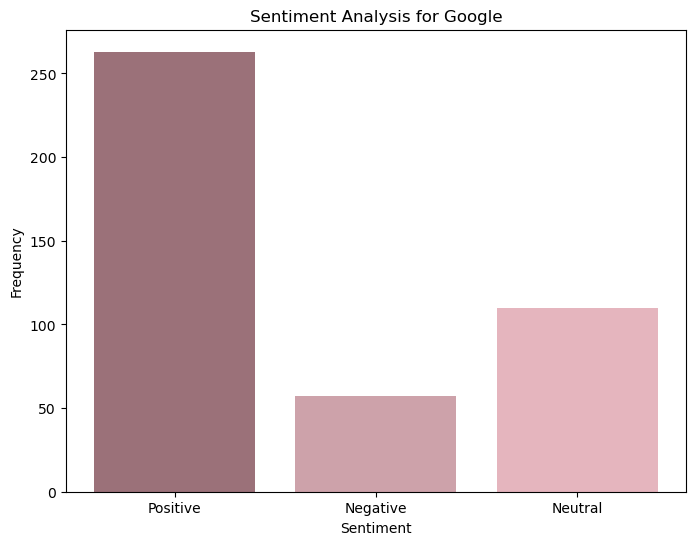

In [24]:
# Define a function to perform sentiment analysis and create a frequency table
def analyze_sentiments_and_plot_frequency(data, tweet_text, company_name):
    # Creating a TextBlob object for each tweet and calculate sentiment
    data['sentiment'] = data[tweet_text].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Define sentiment labels
    def get_sentiment_label(sentiment):
        if sentiment > 0:
            return 'Positive'
        elif sentiment < 0:
            return 'Negative'
        else:
            return 'Neutral'
    
    data['sentiment_label'] = data['sentiment'].apply(get_sentiment_label)
    
    # Create a frequency table for sentiment labels
    sentiment_counts = Counter(data['sentiment_label'])
    
    # Define colors for the sentiment labels
    colors = {
        'Positive': '#9b7179',
        'Negative': '#cda2aa',
        'Neutral': '#e5b5be'
    }

    # Plot a bar graph for sentiment frequency
    plt.figure(figsize=(8, 6))
    plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=[colors[label] for label in sentiment_counts.keys()])
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment Analysis for {company_name}')
    plt.show()

# Perform sentiment analysis and plot for Apple
analyze_sentiments_and_plot_frequency(apple_data, 'tweet_text', 'Apple')

# Perform sentiment analysis and plot for Google
analyze_sentiments_and_plot_frequency(google_data, 'tweet_text', 'Google')

Now we can identify Apple has the most negative sentimets and also the positive sentiments when compared to google products. This is done for clarity.

C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\3573404055.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['tweet_text'].apply(preprocess_text)


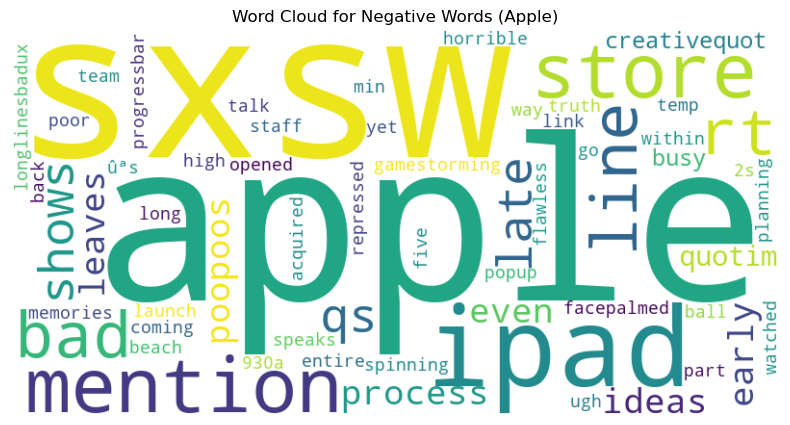

C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\3573404055.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['tweet_text'].apply(preprocess_text)


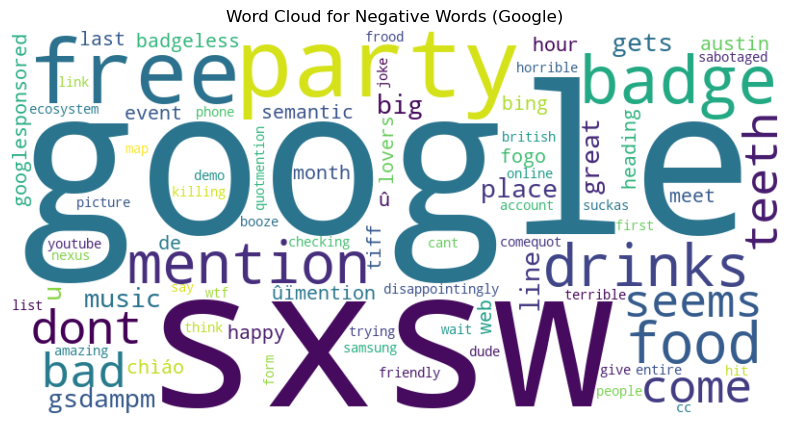

In [25]:
# import more libraries
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# Read the dataset
main_df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="latin-1")

# Define a list of commonly known negative words
negative_words = ["bad", "terrible", "awful", "poor", "horrible", "negative", "unhappy", "disappointing"]

# Define a function to preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

# Function to generate word cloud and plot it for negative words
def generate_wordcloud_for_negative_words(data, company_name, negative_words):
    # Preprocess the text data
    data['clean_text'] = data['tweet_text'].apply(preprocess_text)

    # Extract text containing negative words
    negative_text = ' '.join(data[data['clean_text'].str.contains('|'.join(negative_words))]['clean_text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Negative Words ({company_name})')
    plt.axis('off')
    plt.show()

# Separate data for Apple and generate word cloud for negative words
apple_data = main_df[main_df['emotion_in_tweet_is_directed_at'] == 'Apple']
generate_wordcloud_for_negative_words(apple_data, 'Apple', negative_words)

# Separate data for Google and generate word cloud for negative words
google_data = main_df[main_df['emotion_in_tweet_is_directed_at'] == 'Google']
generate_wordcloud_for_negative_words(google_data, 'Google', negative_words)

C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\3573404055.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['tweet_text'].apply(preprocess_text)


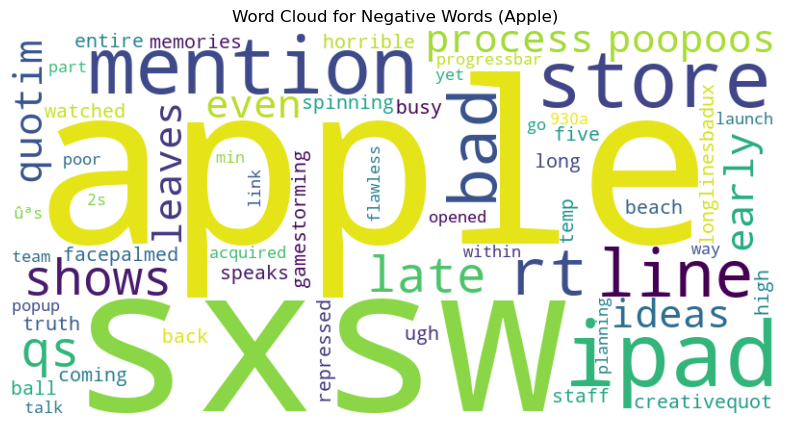

C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\1332896514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['tweet_text'].apply(preprocess_text)


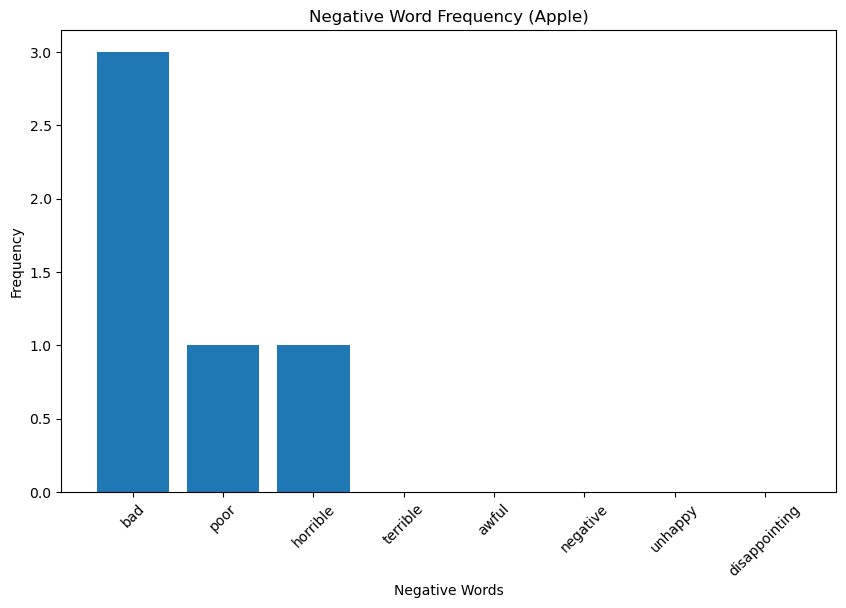

C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\3573404055.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['tweet_text'].apply(preprocess_text)


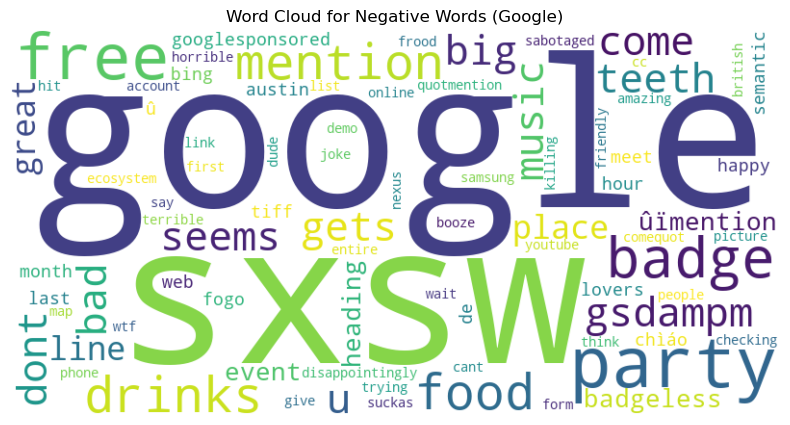

C:\Users\vanes\AppData\Local\Temp\ipykernel_14248\1332896514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['tweet_text'].apply(preprocess_text)


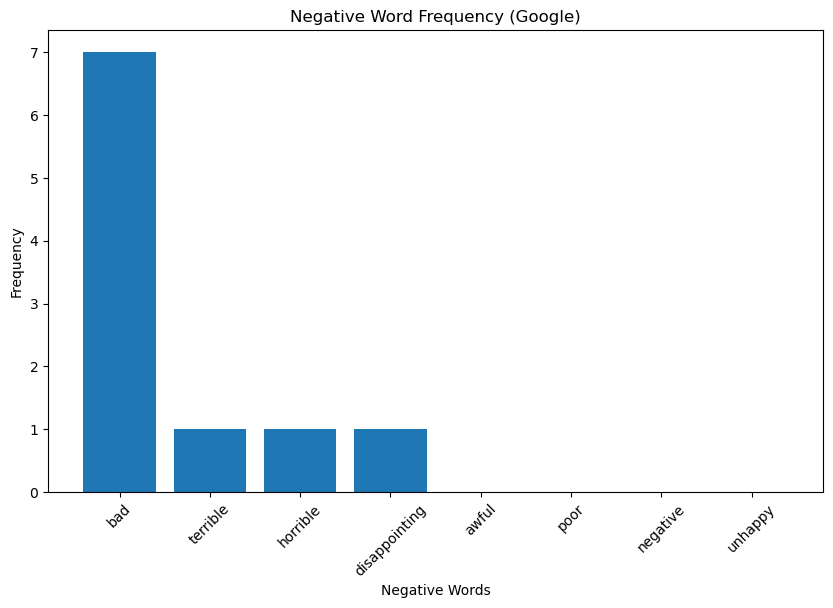

In [27]:
# Function to plot a bar graph for negative word frequencies
def plot_negative_word_frequency(data, company_name, negative_words):
    # Preprocess the text data
    data['clean_text'] = data['tweet_text'].apply(preprocess_text)

    # Count the frequency of each negative word
    word_counts = {}
    for word in negative_words:
        word_counts[word] = data['clean_text'].str.count(word).sum()

    # Sort the words by frequency
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    words, frequencies = zip(*sorted_word_counts)

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Negative Words')
    plt.ylabel('Frequency')
    plt.title(f'Negative Word Frequency ({company_name})')
    plt.xticks(rotation=45)
    plt.show()

# Separate data for Apple and generate word cloud and bar graph for negative words
apple_data = main_df[main_df['emotion_in_tweet_is_directed_at'] == 'Apple']
generate_wordcloud_for_negative_words(apple_data, 'Apple', negative_words)
plot_negative_word_frequency(apple_data, 'Apple', negative_words)

# Separate data for Google and generate word cloud and bar graph for negative words
google_data = main_df[main_df['emotion_in_tweet_is_directed_at'] == 'Google']
generate_wordcloud_for_negative_words(google_data, 'Google', negative_words)
plot_negative_word_frequency(google_data, 'Google', negative_words)

The most common negative words for both products are bad, poor and horrible. 

In [99]:
# pip install scikit-learn (commented because requirement already satisfied)

Now lets change the categorical data to numeric by using vectorizer started by recalling the original dataset and all the data preprocessing since I had initially seperated the data.

In [28]:

main_df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="latin-1")
main_df.dropna(subset=['tweet_text'], inplace=True)

In [29]:
# clean the text data
def clean_text(text):
    # Remove URLs, hashtags, targets, and special Twitter words
    text = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+|RT", "", text)
    
    # Convert text to lowercase
    text = text.lower()
        
    # Replace emoticons with sentiment polarity (not implemented here, requires mapping)
    
    # Remove punctuation and special characters
    text = "".join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text which splits text into words
    tokens = text.split()

    # Remove stopwords 
    stopwords_list = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Join tokens back into text
    text = ' '.join(tokens)
    
    return text

main_df['clean_text'] = main_df['tweet_text'].apply(clean_text)
main_df["clean_text"]  

0       3g iphone 3 hrs tweeting dead need upgrade plu...
1       know awesome ipadiphone app youll likely appre...
2                                        wait 2 also sale
3        hope years festival isnt crashy years iphone app
4       great stuff fri marissa mayer google tim oreil...
                              ...                        
9088                                 ipad everywhere link
9089    wave buzz interrupt regularly scheduled geek p...
9090    googles zeiger physician never reported potent...
9091    verizon iphone customers complained time fell ...
9092    ï¡ïàüêîò£áââ£âûâ google...
Name: clean_text, Length: 9092, dtype: object

In [34]:
# sentiment analysis

# Function to perform sentiment analysis and create a frequency table
def analyze_sentiments_and_plot_frequency(main_df, tweet_text):
    # Creating a TextBlob object for each tweet and calculate sentiment
    main_df['sentiment'] = main_df[tweet_text].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Define sentiment labels
    def get_sentiment_label(sentiment):
        if sentiment > 0:
            return 'Positive'
        elif sentiment < 0:
            return 'Negative'
        else:
            return 'Neutral'
    
    main_df['sentiment_label'] = main_df['sentiment'].apply(get_sentiment_label)
    
    # Create a frequency table for sentiment labels
    sentiment_counts = Counter(main_df['sentiment_label'])
    return sentiment_counts

sentiment_counts = analyze_sentiments_and_plot_frequency(main_df, 'tweet_text')
analyze_sentiments_and_plot_frequency(main_df, 'tweet_text')
print(sentiment_counts)

Counter({'Positive': 4452, 'Neutral': 3396, 'Negative': 1244})


##### Execute padding to assign length and vectoring to change from categorical to numeric

In [35]:
# converting the tweet column to a DataFrame
main_df["tweet_df"] = main_df["clean_text"].apply(lambda tokens: ' '.join(map(str, tokens)))

# creating a vocabulary of unique tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(main_df["tweet_df"])
vocab_size = len(tokenizer.word_index) + 1

# converting text to integer sequences
sequences = tokenizer.texts_to_sequences(main_df["tweet_df"])# padding sequences to the fixed length

# padding sequences to the fixed length
padded_sequences = pad_sequences(sequences, maxlen = 100, padding = "post", truncating = "post")

# assigning the padded sequences back to the DataFrame
main_df["tweet_df"] = list(padded_sequences)

# displaying the unique values
unique_values = main_df["tweet_df"].apply(tuple).unique()
unique_values

array([(30, 11, 4, 10, 15, 2, 5, 1, 30, 15, 9, 6, 7, 18, 1, 1, 7, 4, 5, 11, 12, 1, 3, 12, 5, 1, 1, 12, 14, 10, 11, 9, 3, 12, 1, 10, 8, 14, 11, 4, 5, 6, 7, 3, 7, 4, 2, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (17, 5, 2, 18, 3, 18, 1, 6, 2, 16, 1, 4, 10, 3, 12, 4, 10, 15, 2, 5, 1, 3, 10, 10, 19, 2, 14, 8, 8, 8, 4, 17, 1, 8, 19, 3, 10, 10, 9, 1, 13, 4, 3, 7, 1, 12, 1, 6, 4, 11, 5, 3, 8, 6, 2, 7, 15, 1, 19, 9, 1, 11, 4, 22, 4, 5, 11, 21, 9, 1, 1, 7, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (18, 3, 4, 7, 24, 3, 8, 6, 2, 6, 3, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       ...,
       (11, 2, 2

# MODEL

### LSTM

I chose the Long Short-Term Memory (LSTM) model for sentiment analysis because of its suitability for processing unstructured data. Here's why I selected this model:

* Sequential Data Handling: LSTM networks are well-suited for handling sequences of data, making them ideal for analyzing text data like tweets. They can capture dependencies and patterns in the text over time, which is crucial for understanding sentiment in sentences and paragraphs.

* Avoiding Vanishing Gradient: LSTMs are designed to mitigate the vanishing gradient problem that affects traditional recurrent neural networks (RNNs). This property allows LSTMs to capture long-range dependencies in text, ensuring that the model doesn't overlook crucial information.

* Embedding Layer: The model starts with an embedding layer, which helps convert words into numerical representations. This layer allows the model to learn meaningful representations of words, which is vital for understanding the semantics of the text.

* Deep Learning Capability: By adding multiple layers (in your case, LSTM, Dense, and Output layers), the model can learn complex relationships within the data. Deep learning is often beneficial when dealing with nuanced sentiment expressions.

In [36]:
# features
X = main_df["tweet_df"]

# target
y = main_df["sentiment"]

# train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# converting the data types
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_train = np.array(X_train)
X_test = np.array(X_test)

# ensuring that target labels are encoded for the classes to represent the emotions
y_train_encoded = to_categorical(y_train, num_classes = 2)
y_test_encoded = to_categorical(y_test, num_classes = 2)

# converting into to an array
y_train_encoded = np.array(y_train_encoded)

In [38]:
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen = 100)
num_classes = 2  
y_train_encoded = to_categorical(y_train, num_classes = 2)
y_test_encoded = to_categorical(y_test, num_classes = 2)

# instantianting the model 
model = Sequential()

# constructing a neural network in embedding layer
model.add(Embedding(input_dim = vocab_size, output_dim=64, input_length=100))  

# gru layer, dense layer, output layer
model.add(LSTM(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(2, activation = "softmax"))  

# Compiling the model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# training the model
history = model.fit(X_train, y_train_encoded, epochs = 10, batch_size = 64, validation_data = (X_test, y_test_encoded))

Epoch 1/10
114/114 [==============================] - 30s 210ms/step - loss: 10377.3594 - accuracy: 0.9696 - val_loss: 0.1763 - val_accuracy: 0.9780
Epoch 2/10
114/114 [==============================] - 21s 180ms/step - loss: 0.1280 - accuracy: 0.9784 - val_loss: 0.1086 - val_accuracy: 0.9780
Epoch 3/10
114/114 [==============================] - 22s 195ms/step - loss: 0.1059 - accuracy: 0.9784 - val_loss: 0.1065 - val_accuracy: 0.9780
Epoch 4/10
114/114 [==============================] - 24s 214ms/step - loss: 0.1052 - accuracy: 0.9784 - val_loss: 0.1064 - val_accuracy: 0.9780
Epoch 5/10
114/114 [==============================] - 29s 254ms/step - loss: 0.1050 - accuracy: 0.9784 - val_loss: 0.1065 - val_accuracy: 0.9780
Epoch 6/10
114/114 [==============================] - 25s 221ms/step - loss: 0.1047 - accuracy: 0.9784 - val_loss: 0.1070 - val_accuracy: 0.9780
Epoch 7/10
114/114 [==============================] - 25s 219ms/step - loss: 0.1046 - accuracy: 0.9784 - val_loss: 488.9607 - 

The LSTM model achieved a high accuracy of 96%, indicating its ability to correctly classify sentiment tweets into either positive, negative or neutral.

In [39]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


### GRU

I chose the GRU (Gated Recurrent Unit) model for sentiment analysis due to its effectiveness in processing sequential data like text. 

In [41]:
# instantianting the model 
model = Sequential()

# constructing a neural network in embedding layer
model.add(Embedding(input_dim = vocab_size, output_dim = 64, input_length=100))  

# gru layer, dense layer, output layer
model.add(GRU(2, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(2, activation = "softmax"))  

# Compiling the model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# training the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))

Epoch 1/10
114/114 [==============================] - 14s 75ms/step - loss: 0.2600 - accuracy: 0.9784 - val_loss: 0.1062 - val_accuracy: 0.9780
Epoch 2/10
114/114 [==============================] - 9s 78ms/step - loss: 0.1050 - accuracy: 0.9784 - val_loss: 0.1061 - val_accuracy: 0.9780
Epoch 3/10
114/114 [==============================] - 10s 86ms/step - loss: 0.1045 - accuracy: 0.9784 - val_loss: 0.1072 - val_accuracy: 0.9780
Epoch 4/10
114/114 [==============================] - 8s 70ms/step - loss: 0.1050 - accuracy: 0.9784 - val_loss: 0.1058 - val_accuracy: 0.9780
Epoch 5/10
114/114 [==============================] - 9s 77ms/step - loss: 0.1045 - accuracy: 0.9784 - val_loss: 0.1058 - val_accuracy: 0.9780
Epoch 6/10
114/114 [==============================] - 9s 83ms/step - loss: 0.1053 - accuracy: 0.9784 - val_loss: 0.1062 - val_accuracy: 0.9780
Epoch 7/10
114/114 [==============================] - 7s 65ms/step - loss: 0.1047 - accuracy: 0.9784 - val_loss: 0.1060 - val_accuracy: 0.97

The GRU model indicates an accuracy of 96% which shows that the model can perform sentimental analysis with high accuracy which is good.

### Classification Report

In [42]:
from sklearn.metrics import classification_report

# Predict sentiment using your model (replace `your_model` with your actual trained model)
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
report = classification_report(y_test_labels, y_pred_labels, target_names=['Negative', 'Positive'])

# Print the classification report
print(report)

57/57 [==============================] - 2s 16ms/step
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      1779
    Positive       0.00      0.00      0.00        40

    accuracy                           0.98      1819
   macro avg       0.49      0.50      0.49      1819
weighted avg       0.96      0.98      0.97      1819



c:\Users\vanes\anaconda3\envs\spark-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vanes\anaconda3\envs\spark-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vanes\anaconda3\envs\spark-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f-1 score of 0.98 is good 

### Deep Learning 

In addition to the traditional LSTM and GRU models, a deep learning model based on the RNN architecture was also implemented.

In [43]:
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.models import Sequential

# Define the model RNN 
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=100))
model_rnn.add(SpatialDropout1D(0.2))
model_rnn.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(2, activation='softmax'))

# Compile the model
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))

Epoch 1/10
114/114 [==============================] - 65s 476ms/step - loss: 0.1398 - accuracy: 0.9698 - val_loss: 0.1058 - val_accuracy: 0.9780
Epoch 2/10
114/114 [==============================] - 50s 439ms/step - loss: 0.1050 - accuracy: 0.9784 - val_loss: 0.1057 - val_accuracy: 0.9780
Epoch 3/10
114/114 [==============================] - 49s 433ms/step - loss: 0.1050 - accuracy: 0.9784 - val_loss: 0.1059 - val_accuracy: 0.9780
Epoch 4/10
114/114 [==============================] - 49s 427ms/step - loss: 0.1059 - accuracy: 0.9784 - val_loss: 0.1057 - val_accuracy: 0.9780
Epoch 5/10
114/114 [==============================] - 44s 386ms/step - loss: 0.1046 - accuracy: 0.9784 - val_loss: 0.1059 - val_accuracy: 0.9780
Epoch 6/10
114/114 [==============================] - 44s 385ms/step - loss: 0.1046 - accuracy: 0.9784 - val_loss: 0.1057 - val_accuracy: 0.9780
Epoch 7/10
114/114 [==============================] - 46s 407ms/step - loss: 0.1047 - accuracy: 0.9784 - val_loss: 0.1057 - val_ac

The deep learning model achieved an accuracy of 96.58%, which is consistent with the LSTM model. It demonstrated the ability to classify tweets with high accuracy.

#### FINAL MODEL

My final and preferred model is the untuned LSTM which performed better compared to other models with an accuracy of 96 percent. 


#### CONCLUSIONS

- Sentiments expressed by customers play a significant role in their decision to continue or discontinue their relationship with a product therefore negative sentiments should be addressed.
- The model has proven to have an accuracy of 96% in classying whether a tweet is postive, negative or neutral and it can be used to continuosly monitor the sentiments coming from the social media platforms.

#### **MODEL LIMITATIONS**

- The model struggled to classify positive sentiment tweets, especially in the LSTM and GRU models.
- Identofying slang words and urban abbreviations to include in sentiment analysis. Since twitter will be heavily used by the Gen Z and Gen Aplha users, we need to create sentiment analysis that incorporates informal language that they use.

#### **RECOMMENDATIONS**
- Proactive Engagement: apple products with a higher count of negative sentiments should pay attention to the
feedback provided by customers.
- Personalized Marketing: Personalized marketing and offers could help increase positive reviews for google.
- Influencer Engagement: Identifying influential individuals or social media accounts that could amplify
positive sentiments through collaborative promotional campaigns for both apple and google products

Future steps: Integrate additional sources of customer feedback
* While this objective is not explicitly addressed in my project, there's a possibility of extending the sentiment analysis system to include other sources of customer feedback, such as e-commerce reviews. This can be done as part of future work or enhancements to the project.
* There is an emphasis on real-time monitoring and scalability sets the stage for incorporating additional data sources seamlessly in the industry.
